In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl

In [17]:
f=np.loadtxt('results.csv')

### Theoretical formula

In [18]:
t = np.arange(0.0, 1.001, 0.01)  
y = (t)/(2-t)
s = (2 * t )/(3-t)
l = 1 - t

### Defining parameters

In [19]:
lenth = 90
pore_r = 8
r_width = 32
r_length = 40
cns=0.0006
radius=2 #nm
reservoir_area= r_width*r_width*r_length
parea = lenth*3.14*(pore_r*pore_r)
t_area = parea + 0*reservoir_area
print(reservoir_area)
print(parea)
print(t_area)
################Theoretical
rbtheory=(4*3.14*radius)*1.00199
rbsim=0.015909
print(rbtheory*cns,rbsim)

40960
18086.4
18086.4
0.015101993279999998 0.015909


### Making Plots

In [20]:
f = np.loadtxt('results.csv')
vpore = f[:,-2]
vdomain=f[:,-3]
vporehalfdomain=vpore+(vdomain/2)
vporehalfdomain=vporehalfdomain/np.max(vporehalfdomain)
vpore=vpore/np.max(vpore)
vdomain=vdomain/np.max(vdomain)
number=f[:,1]
x = f[:,5]
Ka=f[:,3]
Kan=f[:,3]
Ka=Ka/np.max(Ka)
x=x/np.max(x)
###########Defining parameters
phi = (t_area-(4/3*(number)*3.14*(0.25*0.25*0.25)))/t_area
phi_c = 1 - phi


In [21]:
###########
d536 = f[:,12]
d536=d536/np.max(d536)
x536 = f[:,3]
x536=x536/np.max(x536)
###########over definition
dent=f[:,5]
d_cent = dent/max(dent)
#fig, ax1=plt.subplots()
#################adding theoretical values
rtb=[1,(rbtheory*cns)/np.max(Kan)]
rsb=[1,rbsim/np.max(Kan)]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


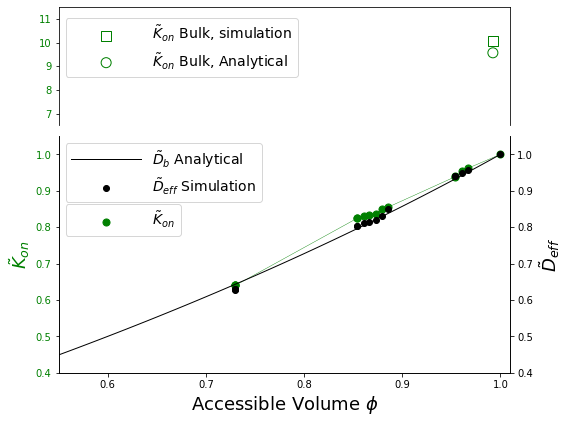

In [22]:
fig = plt.figure(constrained_layout=True)
gs = mpl.gridspec.GridSpec(2, 3, figure=fig,height_ratios=[1.5, 3]) 
ax1 = fig.add_subplot(gs[0, :])
ax3 = fig.add_subplot(gs[1, :])

ax3.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.tick_params(axis='x',which='both',bottom=False,labelbottom=False)
ax3.set_xlabel('Accessible Volume $\phi$',fontsize=18)
ax3.set_ylabel('$\~{K}_{on}$',fontsize=18,color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.scatter(rsb[0],rsb[1],label='$\~K_{on}$ Bulk, simulation',color='green',marker='s',facecolor='none',s=100)
ax1.scatter(rtb[0],rtb[1],label='$\~K_{on}$ Bulk, Analytical',color='green',marker='o',facecolor='none',s=100)
#ax1.set_xticklabels(fontsize=18)
ax1.set_ylim(6.5,11.5)
ax1.set_xlim(0.75,1.01)
ax3.set_ylim(0.4,1.05)
ax3.set_xlim(0.55,1.01)
ax1.yaxis.label.set_size(16)
ax3.plot(vdomain,Ka,color='green',linewidth=0.4)
ax3.scatter(vdomain,Ka,color='green',linewidth=1,label='$\~{K}_{on}$',marker='o',s=50)
ax3.tick_params(axis='y', labelcolor='green')
ax2 = ax3.twinx()  # instantiate a second axes that shares the same x-axis
ax2.scatter(vdomain,x,color='black',label='$\~{D}_{eff}$ Simulation')
ax2.plot(t, s, '-k', linewidth=1, label='$\~{D}_{b}$ Analytical')
ax2.spines['top'].set_visible(False)
ax2.set_ylim(0.4,1.05)
ax2.set_xlim(0.55,1.01)
ax2.set_ylabel('$\~{D}_{eff}$', fontsize=18)  # we already handled the x-label with ax1

ax2.tick_params(axis='y', labelcolor='black')
plt.rc('figure', figsize=(8, 6))
params = {'legend.fontsize': 14,
           'legend.handlelength': 5,
         'xtick.labelsize': 10,
         'ytick.labelsize':10}
plt.rcParams.update(params)
leg = ax1.legend(loc=3, bbox_to_anchor=(0.0,0.35), ncol=1)
leg = ax3.legend(loc=3, bbox_to_anchor=(0.0,0.55), ncol=1)
leg = ax2.legend(loc=3, bbox_to_anchor=(0.0,0.035), ncol=1)

plt.legend()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.gcf().savefig("reactivity&diffusion_inclusiolns.png",dpi=500)
plt.show()